In [1]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
from time import time
from torchviz import make_dot
import numpy as np

In [2]:
def plot_mnist_number(img):
    plt.imshow(img.numpy().squeeze(), cmap='gray', interpolation='none')

In [6]:
input_size = 784
hidden_sizes = [256, 64]
output_size = 10
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim = 1))
print(model)

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5,), (0.5,)),])

testset = torchvision.datasets.MNIST('./', train=False, download=True, transform=transform)
trainset = torchvision.datasets.MNIST('./', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.8)
images, labels = next(iter(trainloader))  
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
      images = images.view(images.shape[0], -1)
      optimizer.zero_grad()          
      output = model(images)
      loss = criterion(output, labels)
      
      #backprop
      loss.backward()
      
      #adjust weights
      optimizer.step()
      
      running_loss += loss.item()
    else:
        print(f"Epoch {e} - Training loss: {running_loss/len(trainloader)}")
        print(output)
print("\nTraining Time (in minutes) =",(time()-time0)/60)  

1290e+01, -7.5099e+00],
        [-4.2023e+00, -9.7154e+00, -7.5516e+00, -1.0412e+01, -7.9981e+00,
         -1.7688e-02, -6.9614e+00, -8.2526e+00, -8.8146e+00, -8.2444e+00]],
       grad_fn=<LogSoftmaxBackward>)
Epoch 7 - Training loss: 0.18176988770912408
tensor([[-1.0599e+01, -1.2221e+01, -8.8987e+00, -7.2185e+00, -1.0137e+01,
         -7.4065e+00, -1.6097e+01, -1.8651e-02, -8.6487e+00, -4.0890e+00],
        [-1.1850e+01, -1.4819e+01, -1.3510e+01, -7.6358e+00, -1.0015e+01,
         -6.6555e+00, -1.7128e+01, -8.6605e-03, -6.9796e+00, -5.1381e+00],
        [-1.3334e+01, -1.4707e+01, -7.8482e+00, -1.0285e+01, -7.0347e+00,
         -1.0780e+01, -1.3969e+01, -3.1754e+00, -6.7361e+00, -4.5304e-02],
        [-6.9940e+00, -1.7175e+01, -8.1815e+00, -9.5759e+00, -1.1969e+01,
         -6.0733e+00, -1.3038e+01, -6.0548e-03, -1.2962e+01, -6.0094e+00],
        [-1.8525e+01, -1.0611e+01, -1.2766e+01, -5.1755e+00, -3.6151e+00,
         -8.9330e+00, -1.3753e+01, -6.8025e+00, -6.2765e+00, -3.6372e-02],

Predicted Digit = 0


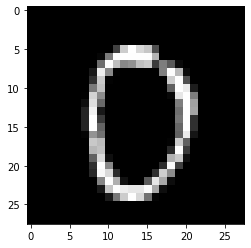

In [4]:
images, labels = next(iter(testloader))
img = images[0].view(1, 784)

with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])

print("Predicted Digit =", probab.index(max(probab)))

plot_mnist_number(img.view(1, 28, 28))